## 콘크리트 데이터셋 도전

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Concrete Compressive Strength Data Set](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)에서 `Concrete_Data.xls`를 다운로드


### 1. 데이터 탐색 및 전처리

* 데이터 적재

In [41]:
import pandas as pd
concrete = pd.read_excel('datasets/Concrete_Data.xls')
concrete

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


statics_
stdev 분산1 평균0
훈련 데이터 테스트 데이터가 있으면
중심을 맞추려고 fit을 하는데
테스트 데이터에서는 fit을하면 중심점이 바뀌니까 하면 안된다. 

* **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Age** -- quantitative -- Day (1~365) -- Input Variable
* **Concrete compressive strength** -- quantitative -- MPa -- Output Variable 

* columns를 단순한 이름으로 변경

In [44]:
concrete.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

* 앞의 2행 확인하기

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [92]:
concrete.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


* 뒤에 2행 확인하기

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [5]:
concrete.tail(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


* 통계치 살펴보기

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


* 누락 정보 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
concrete.info() #누락치 없음 age만 인드 나머지는 float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [13]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

* 각 열의 평균값 확인하기

cement          281.165631
slag             73.895485
ash              54.187136
water           181.566359
superplastic      6.203112
coarseagg       972.918592
fineagg         773.578883
age              45.662136
strength         35.817836
dtype: float64

In [10]:
concrete.mean()

cement          281.165631
slag             73.895485
ash              54.187136
water           181.566359
superplastic      6.203112
coarseagg       972.918592
fineagg         773.578883
age              45.662136
strength         35.817836
dtype: float64

* slag 열의 데이터 분포 확인하기

0         0.0
1         0.0
2       142.5
3       142.5
4       132.4
        ...  
1025    116.0
1026      0.0
1027    139.4
1028    186.7
1029    100.5
Name: slag, Length: 1030, dtype: float64

In [45]:
concrete.slag #공백이 들어가면 인덱싱으로 가져오는게 좋다.

0         0.0
1         0.0
2       142.5
3       142.5
4       132.4
        ...  
1025    116.0
1026      0.0
1027    139.4
1028    186.7
1029    100.5
Name: slag, Length: 1030, dtype: float64

* 위의 수치 데이터로는 특잇값을 한눈에 알아보기 어려우므로 plot으로 확인

<AxesSubplot:>

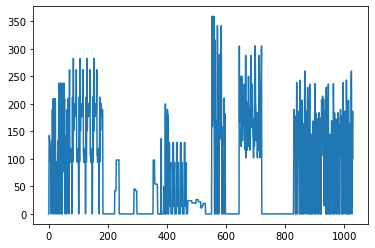

<AxesSubplot:>

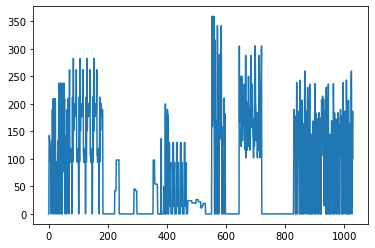

In [46]:
concrete.slag.plot() #너무 높으면 이상치임.

* slag 데이터 값 중 300을 넘어가는 값이 확인됨
* value_counts를 통해 초과되는값이 10개 있음을 알 수 있음

False    1020
True       10
Name: slag, dtype: int64

In [93]:
(concrete.slag >= 300).value_counts()

False    1020
True       10
Name: slag, dtype: int64

* boxplot으로 보다 편리하게 outlier 확인하기

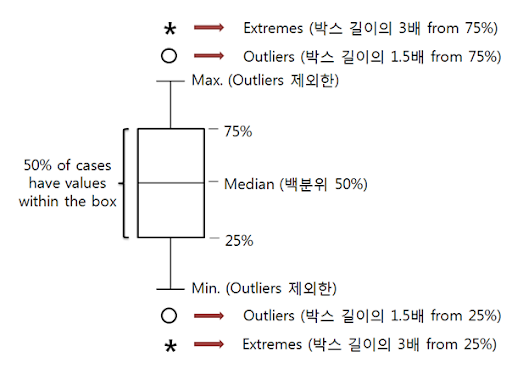

In [25]:
from IPython.display import Image
Image(filename='boxplot.png', width=400)

* boxplot() 함수는 이상치(플라이어(flier)라고 부름)를 감지하고 수염 부분에 이를 포함시키지 않음
* 1사분위가  𝑄1 이고 3사분위가  𝑄3 이라면 사분위수 범위는  𝐼𝑄𝑅=𝑄3−𝑄1 (이 값이 박스의 높이) 
* 𝑄1−1.5×𝐼𝑄𝑅  보다 낮거나  𝑄3+1.5×𝐼𝑄𝑅  보다 높은 점수는 이상치로 간주

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x23f96a464f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23f96a46bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f96a46190>],
 'medians': [<matplotlib.lines.Line2D at 0x23f96a522b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f96a52610>],
 'means': []}

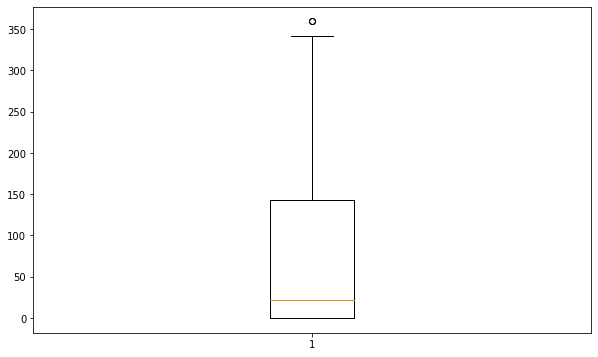

{'whiskers': [<matplotlib.lines.Line2D at 0x1eade604640>,
 'caps': [<matplotlib.lines.Line2D at 0x1eade604b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eade604340>],
 'medians': [<matplotlib.lines.Line2D at 0x1eade855280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eade8555e0>],
 'means': []}

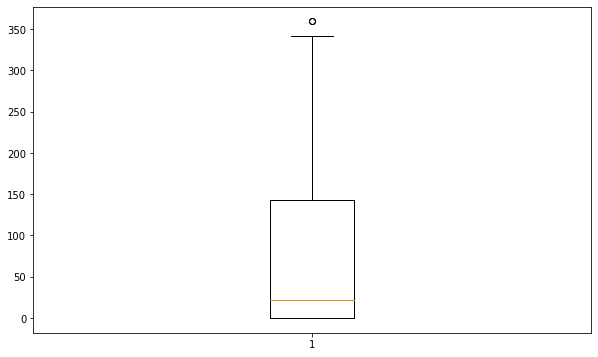

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(concrete.slag)

* 모든 특성에 대해 outlier 확인 (seaborn 의 boxplot 이용)

In [ ]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cement'>

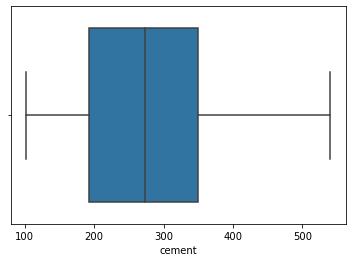

In [51]:
sns.boxplot(concrete.cement)

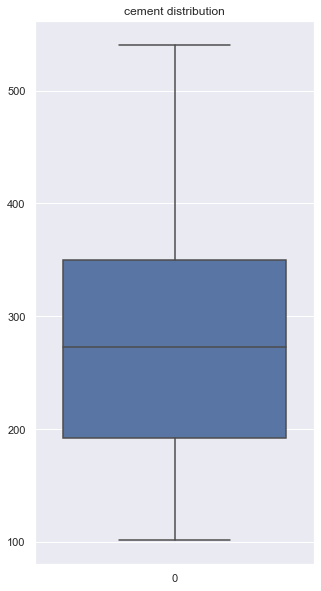

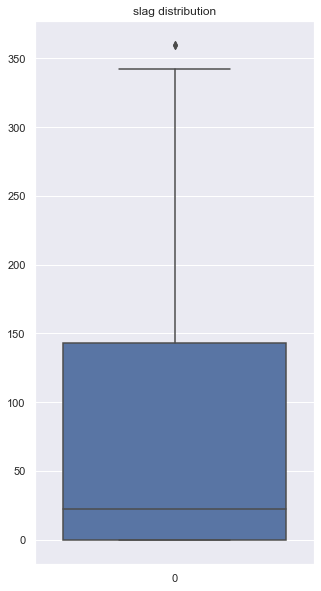

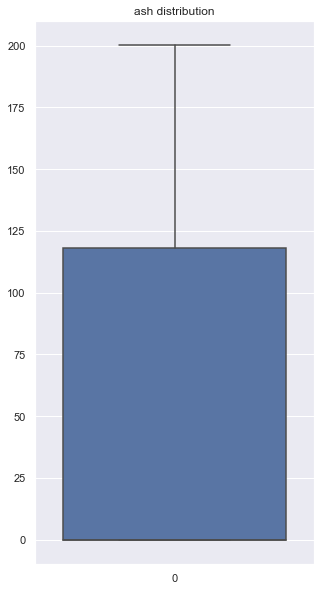

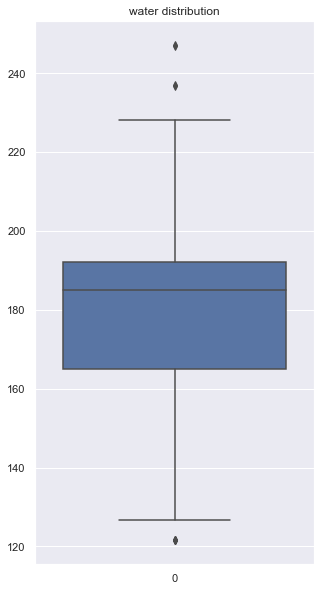

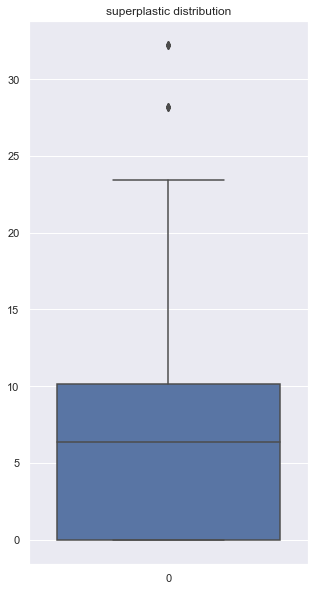

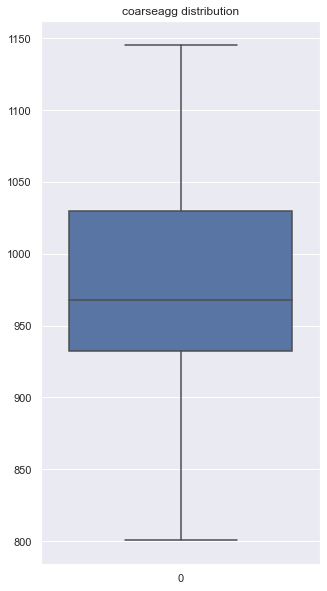

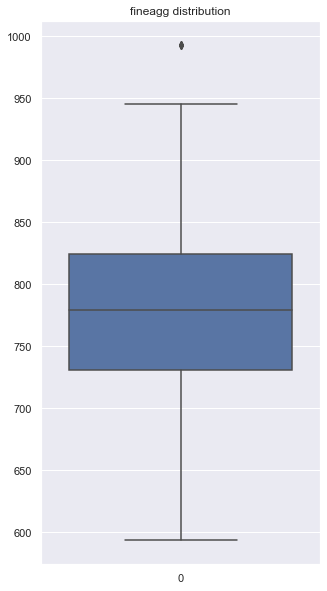

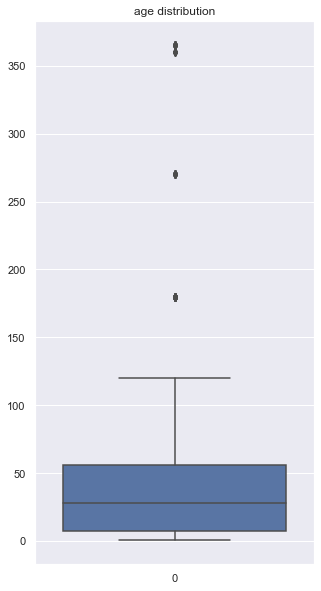

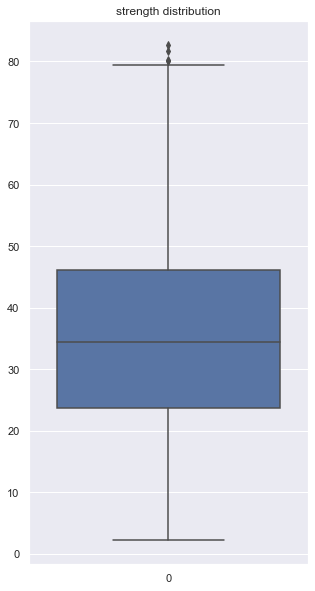

In [62]:
for i in concrete.columns:
    plt.figure(figsize=(5, 10))
    sns.boxplot(data=concrete[i])
    plt.title('{} distribution'.format(i))

In [14]:
names = list(concrete.columns)

fig, axes = plt.subplots(len(names), 1, figsize=(4, 30), constrained_layout=True)

for i in range(len(names)):
    sns.boxplot(concrete[names[i]], ax=axes[i]).set_title(names[i] + ' distribution')

NameError: name 'plt' is not defined

In [16]:
import seaborn as sns

In [17]:
concrete=concrete[concrete["slag"]<350]
concrete=concrete[(concrete["water"]<246) & (concrete["water"]>122)]
concrete=concrete[concrete["superplastic"]<25]
concrete=concrete[concrete["fineagg"]<992]
concrete=concrete[concrete["age"]<150]

- 참고) 위와 같이 아래와 같이 outlier를 제외한 부분만 슬라이싱 해도 됨

In [18]:
q1 = concrete['slag'].quantile(0.25) #일사분위
q3 = concrete['slag'].quantile(0.75) #삼사분위
iqr = q3-q1 #박스의 길이
n=(concrete['slag']<q1-1.5*iqr)|(concrete['slag']>q3+1.5*iqr) #박스보다 .15배 크거나 작은 값을 버리기.
concrete[not n] #공식 적극활용

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [43]:
x = concrete.iloc[:,:-1]
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1
concrete.iloc[:,:-1] = x[(x >= q1-1.5*iqr) & (x <= q3+iqr*1.5)]
#concrete= concrete.fillna(concrete.median())
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,NaN,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,NaN,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


* 아웃라이어들이 제거 되었음을 확인

In [20]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,275.967635,74.381573,57.920908,180.533474,6.261463,974.751056,784.342661,23.476241,35.083587
std,102.206107,86.587351,64.349665,18.770463,5.351153,77.759152,64.847531,14.441477,16.809960
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,623.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,750.000000,7.000000,22.735471
50%,259.900000,20.000000,0.000000,183.800000,6.860000,968.000000,781.000000,28.000000,33.419591
75%,349.000000,145.000000,118.455000,192.000000,10.300000,1032.000000,822.100000,28.000000,44.976588
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,56.000000,82.599225


* 중복 데이터 확인하고 삭제하기

25

In [9]:
concrete.duplicated().sum()

25

False    922
True      25
dtype: int64

In [10]:
concrete.duplicated().value_counts()

False    1005
True       25
dtype: int64

In [106]:
concrete.drop_duplicates()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


* 25개 삭제 되었음을 확인

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


* 타겟 데이터를 제외한 특성 데이터만으로 plot 만들기
* (그래프를 통해 각 특성들의 범위가 다름을 알 수 있음)

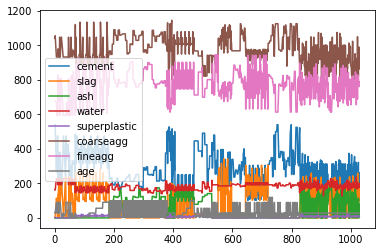

<AxesSubplot:>

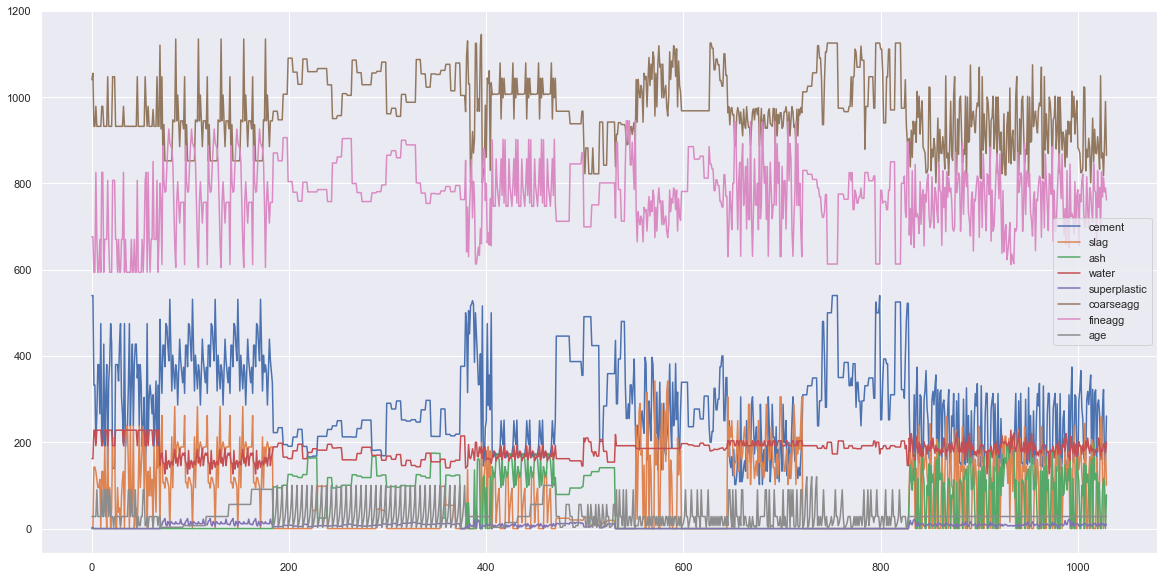

In [99]:
concrete.iloc[:,:-1].plot()

* 정규화, 표준화 작업하기

In [108]:
import numpy as np

In [51]:
def minmax_normalize(arr):
    return (arr-arr.min())/(arr.max()-arr.min())

def zscore_standize(arr):
    return (arr - arr.mean())/arr.std()

* DataFrame의 apply 함수를 통해 정규화(normalize)
* 데이터가 0과 1사이의 범위로 변경되었음을 확인

<AxesSubplot:>

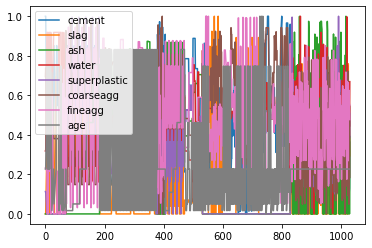

In [116]:
concrete_mm = concrete.loc[:,:'age'].apply(minmax_normalize)
concrete_mm.plot()

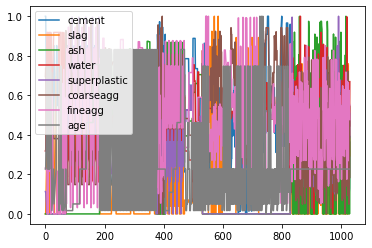

* DataFrame의 apply 함수를 통해 표준화(standarize)
* 데이터의 평균이 0으로 맞추어졌음을 확인

In [54]:
concrete_zs = concrete.loc[:,:'age'].apply(zscore_standize)
concrete_zs.

cement          1.0
slag            1.0
ash             1.0
water           1.0
superplastic    1.0
coarseagg       1.0
fineagg         1.0
age             1.0
dtype: float64

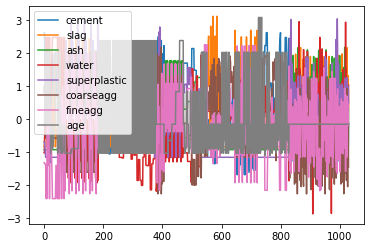

### 2. 모델 훈련 

In [ ]:
concrete_zs

1. 특성과 레이블 분리
2. 훈련 세트와 테스트 세트 분리
3. linearRegression 모델 훈련 (추가적으로 DecisionTree, RandomForest 훈련)
4. 훈련 데이터로 성능 평가 (RMSE)
5. 교차 검증 (모델간 성능 비교)
6. 그리드 탐색(트리모델) -  RandomForest : n_estimators (50, 100, 200) 파라미터 탐색
7. 최적의 모델로 예측 - 테스트 세트로 예측

In [ ]:
linearRegression, DecisionTree, RandomForest
1. 모델생성
2. 학습
3. DecisionTree, RandomForest ()

In [179]:
import pandas as pd
concrete = pd.read_excel('datasets/Concrete_Data.xls')
concrete.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
concrete

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [109]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [182]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(concrete, test_size=0.2, random_state=42)

In [170]:
test_set

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
31,266.0,114.0,0.0,228.0,0.00,932.0,670.0,365,52.908320
109,362.6,189.0,0.0,164.9,11.60,944.7,755.8,7,55.895819
136,389.9,189.0,0.0,145.9,22.00,944.7,755.8,28,74.497882
88,362.6,189.0,0.0,164.9,11.60,944.7,755.8,3,35.301171
918,145.0,0.0,179.0,202.0,8.00,824.0,869.0,28,10.535193
...,...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.64,967.0,712.0,56,56.144031
545,255.0,0.0,0.0,192.0,0.00,889.8,945.0,28,18.746163
110,286.3,200.9,0.0,144.7,11.20,1004.6,803.7,7,37.997022
514,424.0,22.0,132.0,168.0,8.92,822.0,750.0,56,74.364911


In [119]:
concrete_label.isnull().sum()

0

In [117]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 995 to 860
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        824 non-null    float64
 1   slag          824 non-null    float64
 2   ash           824 non-null    float64
 3   water         824 non-null    float64
 4   superplastic  824 non-null    float64
 5   coarseagg     824 non-null    float64
 6   fineagg       824 non-null    float64
 7   age           824 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 57.9 KB


In [130]:
from sklearn.base import BaseEstimator, TransformerMixin
def zscore_standize(arr):
    return (arr - arr.mean())/arr.std()

class Attribution(BaseEstimator, TransformerMixin):
    def fit(self, X):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        X=X[X["slag"]<350]
        X=X[(X["water"]<246) & (X["water"]>122)]
        X=X[X["superplastic"]<25]
        X=X[X["fineagg"]<992]
        X=X[X["age"]<150]
        X.iloc[:,:-1] = X.iloc[:,:-1].apply(zscore_standize)
        return X

In [176]:
#수치형 특성 전처리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('attribs', Attribution())
    ])

In [132]:
concrete = num_pipeline.transform(concrete)

In [135]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(concrete, test_size=0.2, random_state=42)

In [138]:
concrete_prepared = train_set.drop("strength", axis=1)
concrete_label = train_set['strength']

In [142]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(concrete_prepared, concrete_label)

LinearRegression()

In [143]:
from sklearn.metrics import mean_squared_error

concrete_predictions = lin_reg.predict(concrete_prepared) #선형 회귀모델에 적용
lin_rmse = mean_squared_error(concrete_label, concrete_predictions, squared=False) #squared모델을 적용 MSE 모델임 #기본 디폴트가 제곱이라 false하면 제곱근을 굳이 안 구해도 된다.
lin_rmse #mse에서 squared를 해줘서 작게나옴

8.09130880500962

In [145]:
from sklearn.tree import DecisionTreeRegressor #트리 회귀 모델

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(concrete_prepared, concrete_label) #treereg에 훈련데이터 정답데이터 넣기
concrete_predictions = tree_reg.predict(concrete_prepared)

tree_rmse = mean_squared_error(concrete_label, concrete_predictions, squared=False)
tree_rmse

In [146]:
tree_rmse = mean_squared_error(concrete_label, concrete_predictions, squared=False)
tree_rmse

1.0029987120513704

In [211]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lin_reg, concrete_prepared, concrete_label, scoring='neg_mean_squared_error', cv=10)

tree_rmse_score = np.sqrt(-scores)
tree_rmse_score.mean()

8.222162343301504

In [212]:
scores = cross_val_score(tree_reg, concrete_prepared, concrete_label, scoring='neg_mean_squared_error', cv=10)

tree_rmse_score = np.sqrt(-scores)
tree_rmse_score.mean()

7.146383118947803

In [213]:
scores = cross_val_score(forest_reg, concrete_prepared, concrete_label, scoring='neg_mean_squared_error', cv=10)

tree_rmse_score = np.sqrt(-scores)
tree_rmse_score.mean()

5.251850041563137

In [199]:
from sklearn.tree import DecisionTreeClassifier
 , cross_validate
from sklearn.datasets import load_iris


iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=42)

In [210]:
from sklearn.model_selection import cross_val_score

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators' : [50, 100, 200], 'max_features' : [2, 4, 6, 8]} # 12개
] 

In [156]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error', cv=5,
                           return_train_score=True, n_jobs = -1) # 검사할 하이퍼 파라미터 (12 + 6) * 5

In [214]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [157]:
%time grid_search.fit(concrete_prepared, concrete_label)

Wall time: 8.55 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [190]:
grid_search.fit(concrete_prepared, concrete_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [173]:
final_model = grid_search.best_estimator_

test_set = num_pipeline.transform(test_set)

X_test = test_set.drop('strength', axis=1)
y_test = test_set['strength'].copy()

final_predictions = final_model.predict(X_test)

final_predictions

rmse = mean_squared_error(y_test, final_predictions, squared=False)
rmse

from sklearn.metrics import r2_score
r2_score(y_test, final_predictions)

In [183]:
test_set = num_pipeline.transform(test_set)

In [185]:
X_test = test_set.drop('strength', axis=1)
y_test = test_set['strength'].copy()

In [186]:
final_predictions = final_model.predict(X_test)

In [187]:
final_predictions

array([44.524116  , 72.18717193, 35.08582322, 13.38676259, 43.83863141,
       29.06896316, 52.96037525, 34.0447184 , 44.09760253, 35.17877542,
       14.45249254, 32.55176154, 29.24379359, 22.86089368, 33.5876096 ,
       19.66080311, 41.149348  , 29.01749772, 37.17245733, 33.72647007,
       47.5919654 , 10.11859809, 31.51198741, 43.86377364, 11.64136198,
       45.03981975, 49.18439099, 17.65497067, 49.32432802, 37.01100963,
       48.67013152, 58.40461564, 15.45447452, 41.56049633, 33.31237768,
       42.79624416, 12.10945315, 45.08811952, 16.44135501,  5.60450909,
       38.67856939, 51.90322731, 12.27841614, 66.73882719, 55.25667209,
       26.12163942,  6.86327163, 55.21765762, 45.79639162, 28.67880248,
       16.1208452 , 51.73173099, 34.64452411, 28.6562773 , 12.64146662,
       39.33936318, 21.73273857, 41.88881101, 14.61919897, 38.29833027,
       47.55886103, 33.22650344, 17.65799057, 34.48614852, 15.81990271,
       30.68513627, 26.20677592, 11.45340491, 29.31258261, 10.24

In [188]:
rmse = mean_squared_error(y_test, final_predictions, squared=False)
rmse

4.435743189720578

In [204]:
from sklearn.metrics import r2_score
r2_score(y_test, final_predictions)

0.9230253078030737

In [216]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

5.839783481466759 {'max_features': 2, 'n_estimators': 50}
5.821983954955314 {'max_features': 2, 'n_estimators': 100}
5.737875992943844 {'max_features': 2, 'n_estimators': 200}
5.4746480722423785 {'max_features': 4, 'n_estimators': 50}
5.440077595004141 {'max_features': 4, 'n_estimators': 100}
5.458108725442311 {'max_features': 4, 'n_estimators': 200}
5.497559598489638 {'max_features': 6, 'n_estimators': 50}
5.454740231274051 {'max_features': 6, 'n_estimators': 100}
5.475443886893608 {'max_features': 6, 'n_estimators': 200}
5.576067517396073 {'max_features': 8, 'n_estimators': 50}
5.5397699801045235 {'max_features': 8, 'n_estimators': 100}
5.536672496460619 {'max_features': 8, 'n_estimators': 200}


In [184]:
test_set

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
109,1.069829,1.427730,-0.994244,-0.734477,0.968177,-0.371488,-0.389030,-0.858209,55.895819
136,1.378572,1.427730,-0.994244,-1.729110,2.946041,-0.371488,-0.389030,-0.126098,74.497882
88,1.069829,1.427730,-0.994244,-0.734477,0.968177,-0.371488,-0.389030,-0.997658,35.301171
918,-1.391075,-0.834280,1.791812,1.207674,0.283532,-1.995836,1.197846,-0.126098,10.535193
1025,0.094967,0.554044,0.411236,0.035054,0.454693,-1.375434,-0.213801,-0.126098,44.284354
...,...,...,...,...,...,...,...,...,...
482,2.013024,-0.547041,0.235356,-0.886290,0.975784,-0.071381,-1.003033,0.850049,56.144031
545,-0.147052,-0.834280,-0.994244,0.684183,-1.237902,-1.110317,2.263240,-0.126098,18.746163
110,0.206929,1.570153,-0.994244,-1.791929,0.892106,0.434629,0.282449,-0.858209,37.997022
514,1.764220,-0.570978,1.060278,-0.572195,0.458497,-2.022751,-0.470336,0.850049,74.364911


In [272]:
import pandas as pd
concrete = pd.read_excel('datasets/Concrete_Data.xls')
concrete.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [273]:
from sklearn.base import BaseEstimator, TransformerMixin
def minmax_normalize(arr):
    return (arr-arr.min())/(arr.max()-arr.min())

class Attribution_mm(BaseEstimator, TransformerMixin):
    def fit(self, X):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        X=X[X["slag"]<350]
        X=X[(X["water"]<246) & (X["water"]>122)]
        X=X[X["superplastic"]<25]
        X=X[X["fineagg"]<992]
        X=X[X["age"]<150]
        X.iloc[:,:-1] = X.iloc[:,:-1].apply(minmax_normalize)
        return X

In [274]:
#수치형 특성 전처리
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('attribs', Attribution())
    ])

In [275]:
concrete = num_pipeline.transform(concrete)

In [276]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(concrete, test_size=0.2, random_state=42)

In [277]:
test_set

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
655,-1.068113,2.030532,-0.900096,1.206213,-1.170115,0.010918,-1.108937,-0.155712,33.947730
1015,0.455280,0.857151,-0.900096,0.272043,0.418328,-0.305444,-0.884252,-0.155712,52.426376
188,-0.524505,-0.859035,0.602165,0.456238,-0.336649,-0.098651,1.253839,2.366763,40.713558
129,0.847624,1.323732,-0.900096,-0.831016,0.997642,-0.386463,-0.268697,-0.155712,71.298713
73,1.458155,0.368627,-0.900096,-1.543518,2.305772,-0.498347,0.368131,-1.031572,36.300911
...,...,...,...,...,...,...,...,...,...
778,0.186216,-0.859035,-0.900096,0.229821,-1.170115,1.212062,-0.093204,-0.891435,14.796155
812,0.332978,-0.859035,-0.900096,0.599267,-1.170115,-0.061100,0.983686,2.016419,34.680643
987,-1.115077,1.336436,1.401392,-0.097402,2.343147,-1.757363,-0.460144,-0.155712,33.762261
599,0.616718,-0.859035,-0.900096,0.863156,-1.170115,-0.086820,0.066336,-0.891435,20.966965


In [278]:
concrete_prepared = train_set.drop("strength", axis=1)
concrete_label = train_set['strength']

In [279]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(concrete_prepared, concrete_label)

LinearRegression()

In [280]:
from sklearn.metrics import mean_squared_error

concrete_predictions = lin_reg.predict(concrete_prepared) #선형 회귀모델에 적용
lin_rmse = mean_squared_error(concrete_label, concrete_predictions, squared=False) #squared모델을 적용 MSE 모델임 #기본 디폴트가 제곱이라 false하면 제곱근을 굳이 안 구해도 된다.
lin_rmse #mse에서 squared를 해줘서 작게나옴

8.09130880500962

In [281]:
from sklearn.tree import DecisionTreeRegressor #트리 회귀 모델

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(concrete_prepared, concrete_label) #treereg에 훈련데이터 정답데이터 넣기
concrete_predictions = tree_reg.predict(concrete_prepared)

tree_rmse = mean_squared_error(concrete_label, concrete_predictions, squared=False)
tree_rmse

1.0029987120513704

In [282]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error', cv=5,
                           return_train_score=True, n_jobs = -1) # 검사할 하이퍼 파라미터 (12 + 6) * 5

In [283]:
grid_search.fit(concrete_prepared, concrete_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [284]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [285]:
final_model = grid_search.best_estimator_

In [286]:
final_model

RandomForestRegressor(max_features=4, random_state=42)

In [287]:
final_model = grid_search.best_estimator_
X_test = test_set.drop('strength', axis=1)
y_test = test_set['strength'].copy()

In [288]:
X_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
655,-1.068113,2.030532,-0.900096,1.206213,-1.170115,0.010918,-1.108937,-0.155712
1015,0.455280,0.857151,-0.900096,0.272043,0.418328,-0.305444,-0.884252,-0.155712
188,-0.524505,-0.859035,0.602165,0.456238,-0.336649,-0.098651,1.253839,2.366763
129,0.847624,1.323732,-0.900096,-0.831016,0.997642,-0.386463,-0.268697,-0.155712
73,1.458155,0.368627,-0.900096,-1.543518,2.305772,-0.498347,0.368131,-1.031572
...,...,...,...,...,...,...,...,...
778,0.186216,-0.859035,-0.900096,0.229821,-1.170115,1.212062,-0.093204,-0.891435
812,0.332978,-0.859035,-0.900096,0.599267,-1.170115,-0.061100,0.983686,2.016419
987,-1.115077,1.336436,1.401392,-0.097402,2.343147,-1.757363,-0.460144,-0.155712
599,0.616718,-0.859035,-0.900096,0.863156,-1.170115,-0.086820,0.066336,-0.891435


In [289]:
final_predictions = final_model.predict(X_test)
final_predictions

array([33.93192013, 46.50434951, 34.67492015, 71.46570425, 34.89142054,
       16.65203819, 14.47616915, 65.51166826, 36.43087664, 24.81328582,
       32.16368308, 15.09013374, 42.38194493, 11.74789883, 51.35313479,
       37.01050631, 26.76506532, 36.89593575, 34.2898478 , 38.37673748,
       11.03914705, 35.05753107, 28.84986148, 68.82896679, 29.33231542,
       23.93040196, 38.58070516, 24.83914511, 34.47975018, 57.05140818,
       24.99987576, 41.36189966, 48.22588474, 37.26900465, 28.01527147,
       48.36505908, 38.1929478 , 41.20660209, 22.38225255, 28.0868046 ,
       47.61629504, 35.9381436 , 33.37112103, 50.55368343, 35.15464376,
       50.14588891, 57.12898063, 21.294811  , 47.66308222, 21.67221046,
       13.82062226, 61.87908024, 44.52770751, 43.27385798, 24.01886862,
       31.60772017, 35.28878526, 23.63380908, 37.27000439, 15.15205262,
       23.19290395, 31.99463736, 24.01011228, 45.35344859, 39.85389548,
       16.92840775, 45.89426864, 36.12120638, 59.81545591, 61.89

In [292]:
final_model.score(X_test, y_test)

0.8814897891373489

In [290]:
rmse = mean_squared_error(y_test, final_predictions, squared=False)
rmse

from sklearn.metrics import r2_score
r2_score(y_test, final_predictions)

0.8814897891373489

In [291]:
from sklearn.metrics import mean_squared_error

concrete_predictions = lin_reg.predict(concrete_prepared) #선형 회귀모델에 적용
lin_rmse = mean_squared_error(concrete_label, concrete_predictions, squared=False) #squared모델을 적용 MSE 모델임 #기본 디폴트가 제곱이라 false하면 제곱근을 굳이 안 구해도 된다.
lin_rmse #mse에서 squared를 해줘서 작게나옴

8.09130880500962

### 성능지표는 거리를 비교하는 것이다 거리가 짧으면 좋기에 낮은 값이더 좋다.

In [294]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_5, y_train_pre)